In [2]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from streamlit import feedback

In [3]:
# Load the dataset
df=pd.read_csv(r"C:\\Users\\kumar\\Academic_Decision_Support_System\\data\\processed\\student_performance_cleaned.csv")

In [4]:
# Display the first few rows of the dataframe
df.head()

,study_hours_per_day,attendance_percentage,absences,sleep_hours,stress_level,motivation_level,family_support,school_support,activity_level,avg_grade,pass_fail
0,2.6,71,9,4.5,1,2,2,2,1,35.5,0
1,5.7,75,17,5.0,1,2,1,2,1,51.0,0
2,4.5,83,7,8.6,1,1,0,2,1,65.5,1
3,3.8,78,20,6.1,1,0,2,1,2,67.0,1
4,1.4,67,10,6.0,0,1,1,0,2,61.0,0


In [5]:
# Defing weak area detection function and applying it to the dataframe
def detect_weak_areas(row):
    weak = []

    if row["avg_grade"] < 50:
        weak.append("Academic Performance")

    if row["attendance_percentage"] < 75:
        weak.append("Attendance")

    if row["study_hours_per_day"] < 2:
        weak.append("Study Time")

    if row["absences"] > 10:
        weak.append("Discipline / Absences")

    if row["motivation_level"] == 0:
        weak.append("Motivation")

    return weak
df["weak_areas"] = df.apply(detect_weak_areas, axis=1)
df[["avg_grade", "weak_areas"]].head()



,avg_grade,weak_areas
0,35.5,"[Academic Performance, Attendance]"
1,51.0,[Discipline / Absences]
2,65.5,[]
3,67.0,"[Discipline / Absences, Motivation]"
4,61.0,"[Attendance, Study Time]"


In [6]:
# Analyzing common weaknesses across all students

all_weaknesses = Counter([w for sublist in df["weak_areas"] for w in sublist])
all_weaknesses


Counter({'Discipline / Absences': 577,
         'Attendance': 385,
         'Study Time': 281,
         'Motivation': 192,
         'Academic Performance': 168})

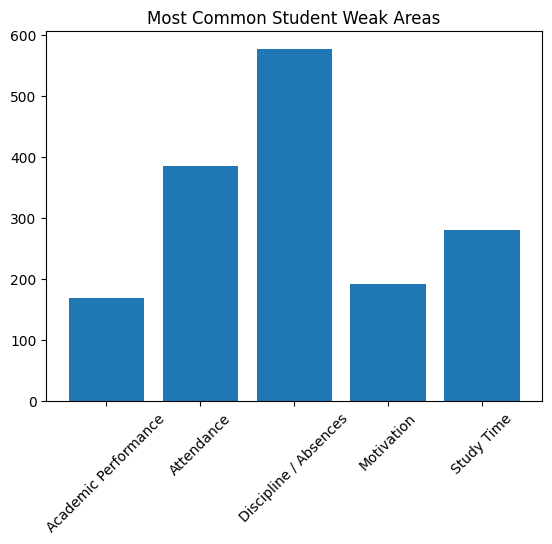

In [7]:

# Visualizing common weaknesses
plt.bar(all_weaknesses.keys(), all_weaknesses.values())
plt.xticks(rotation=45)
plt.title("Most Common Student Weak Areas")
plt.show()


In [8]:
def weak_area_feedback(weak_list):
    feedback = []

    feedback_map = {
        "Academic Performance": "Focus on improving core academic subjects through regular revision and practice.",
        "Attendance": "Maintain regular class attendance to avoid missing important concepts.",
        "Study Time": "Increase daily study hours and follow a structured study plan.",
        "Discipline / Absences": "Reduce absences and maintain better discipline in academic activities.",
        "Motivation": "Work on motivation by setting clear goals and tracking progress.",
        "Low Academic Performance": "Revise weak subjects more frequently and seek teacher support if needed.",
        "Poor Attendance": "Try to attend at least 90% of classes to stay academically updated.",
        "High Absences": "Minimize absences to maintain academic continuity.",
        "Low Study Time": "Increase study time gradually to build a sustainable routine.",
        "High Stress": "Practice stress management techniques such as breaks, exercise, and mindfulness.",
        "Low Motivation": "Set short-term achievable goals to stay motivated.",
        "No Major Weakness Detected": "Great job! Keep maintaining your current academic performance and habits."
    }

    for w in weak_list:
        if w in feedback_map:
            feedback.append(feedback_map[w])
        else:
            feedback.append(f"Work on improving: {w}")

    return feedback


In [9]:
# Checking weakness feedback for a sample student

student = df.iloc[5]

weaknesses = detect_weak_areas(student)

print("Student Profile:")
print(student)

print("\n Weak Areas Detected:")
for w in weaknesses:
    print("-", w)

feedback = weak_area_feedback(weaknesses)

print("\n Personalized Feedback:")
for f in feedback:
    print("-", f)


Student Profile:
study_hours_per_day                                                    1.4
attendance_percentage                                                   90
absences                                                                22
sleep_hours                                                            5.6
stress_level                                                             2
motivation_level                                                         0
family_support                                                           0
school_support                                                           1
activity_level                                                           1
avg_grade                                                             49.0
pass_fail                                                                0
weak_areas               [Academic Performance, Study Time, Discipline ...
Name: 5, dtype: object

 Weak Areas Detected:
- Academic Performance
- Study Time
-